# Importing the libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Importing the Dataset

In [60]:
df = pd.read_csv(r'C:\Users\AKASH\OneDrive\Desktop\Canvas\heart.csv')

In [61]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now lets try and understand what does each variable in the dataset mean in the dataset

Age : Age of the patient


Sex : Sex of the patient


exang: exercise induced angina (1 = yes; 0 = no)


ca: number of major vessels (0-3)


cp : Chest Pain type chest pain type


Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)


chol : cholestoral in mg/dl fetched via BMI sensor


fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


rest_ecg : resting electrocardiographic results


Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved


target : 0= less chance of heart attack 1= more chance of heart attac

In [62]:
df.shape

(303, 14)

The dataset consists of 303 rows and 14 columns.

In [63]:
#Plotting the distribution of age in our dataset
df['age'].iplot(kind = "hist",xTitle = "Age",yTitle = "Distribution",title = "Distribution of Age")

Here we can see most of our age in the dataset lies in the range 40 years to 60 years.

We can also assume the age column to be normally distributed.

In [64]:
#Checking Summary Statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The mean and median in the dataset are very close to each other indicating the absence of outliers of the dataset.

In [65]:
#Checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

The dataset does not contain any null values as proved above.

In [66]:
#Finding the number of categorical variables
categorical_var = 0
a = []
for i in df.columns:
    if len(df[i].unique()) <= 4:  #assuming our threshold to be 4
        categorical_var = categorical_var + 1
        a.append(i)
print(a)        
print("The number of categorical variables are: ",categorical_var)   

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall', 'output']
The number of categorical variables are:  8


From the above loop it is quite clear that we have 8 categorical variables in our dataset

In [67]:
#Using boxplot for outlier detection
df.iplot(kind = "box",theme = "polar")

The above diagram further soldifies our conclusion

<Figure size 1800x1800 with 0 Axes>

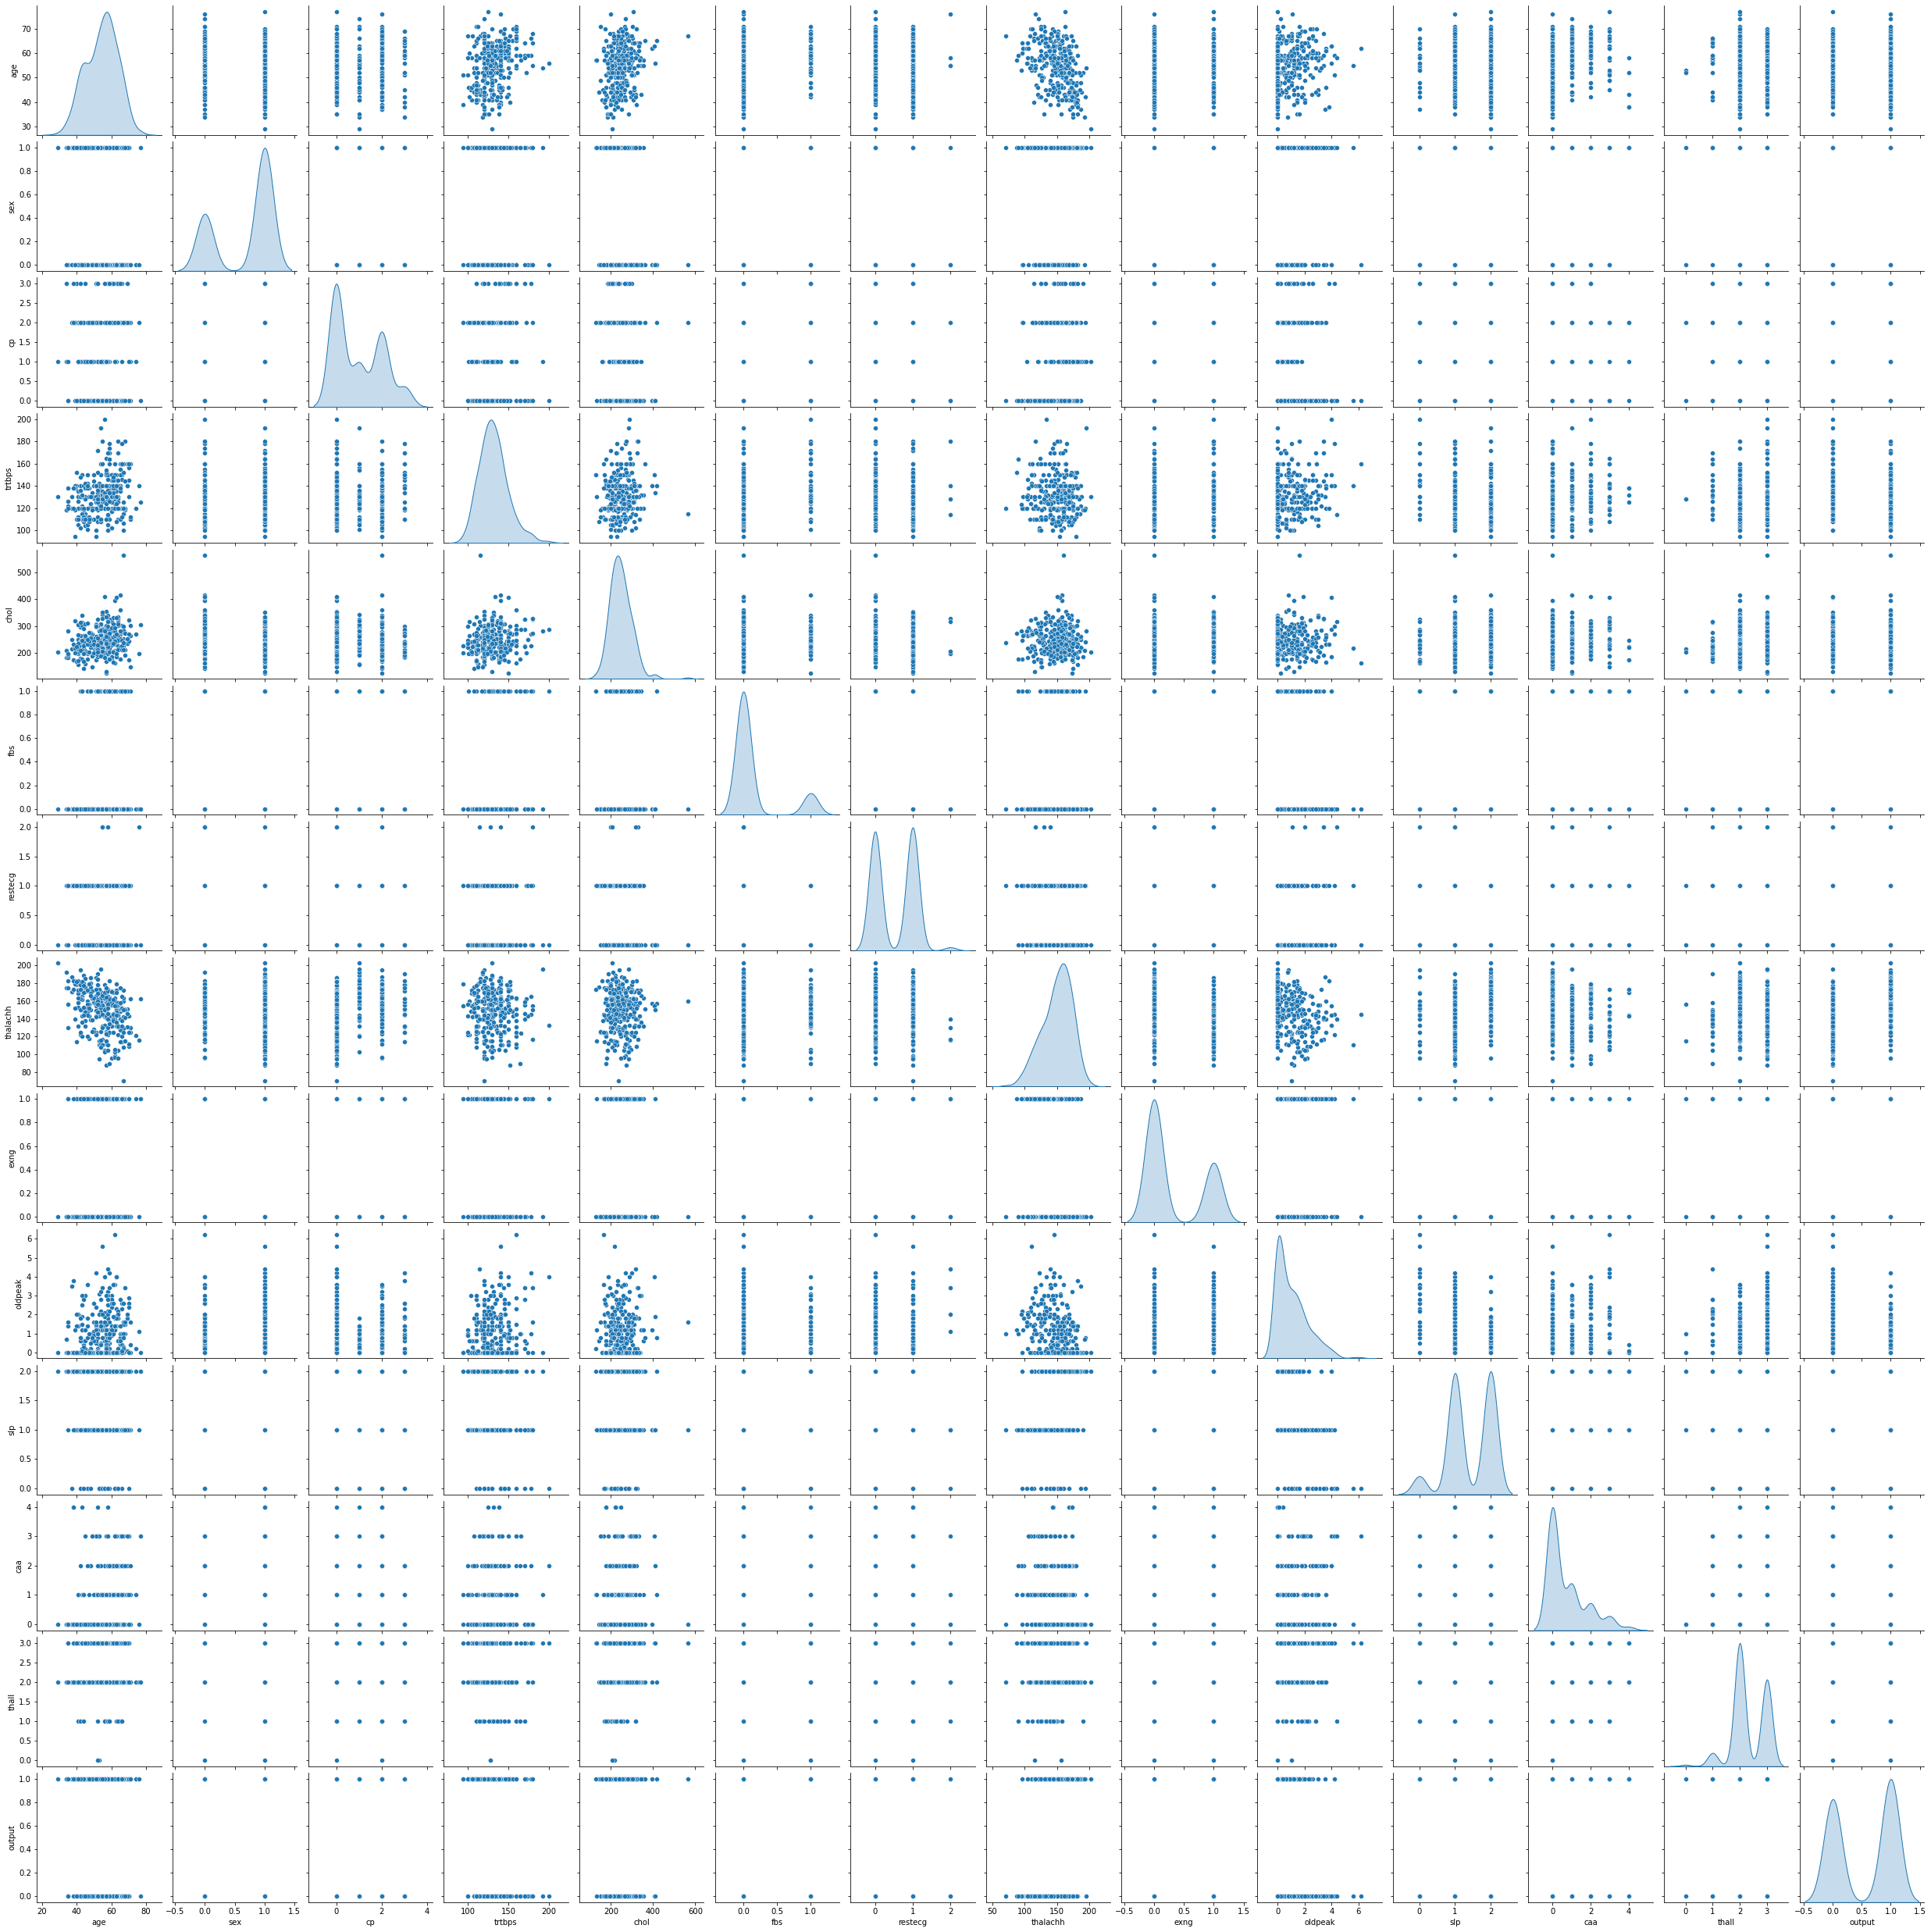

In [68]:
#Checking the distribution of each variable
plt.figure(figsize = (25,25))
sns.pairplot(df,diag_kind = "kde",palette = "deep")

From the above graphs it is clear that the variables in our datset are normally dustributed.

The above description gives a clear indication of slight disbalance in our dataset.

In [75]:
#Plotting the categorical Variables

for i in a:
    df[i].value_counts().iplot(kind= "bar",title = i)

In [79]:
#Describing categorical variables
for i in a:
    print(df[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exng, dtype: int64
2    142
1    140
0     21
Name: slp, dtype: int64
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
1    165
0    138
Name: output, dtype: int64


The above code describes the categorical variables both graphically and descriptively.

# Bivariate Analysis

Effect of Age on heart-attack

<Figure size 1440x1440 with 0 Axes>

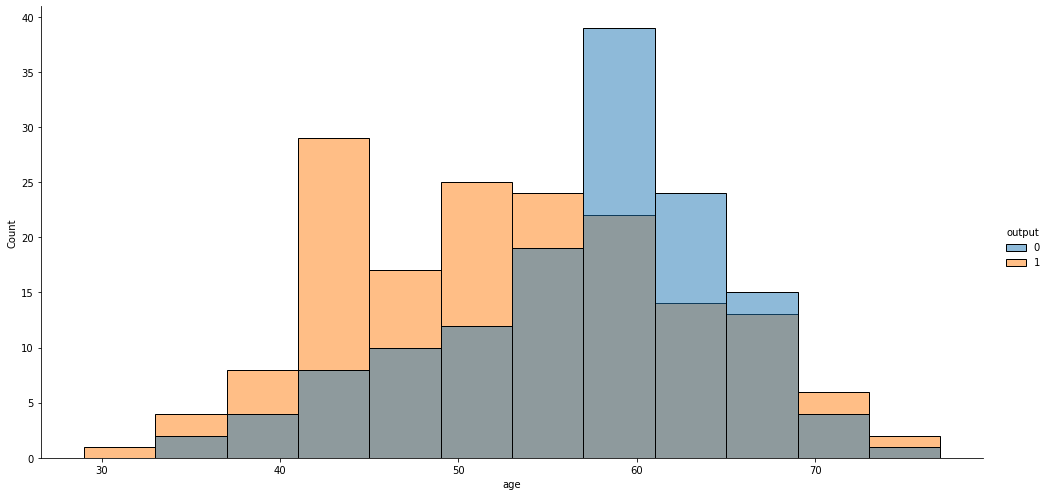

In [96]:
plt.figure(figsize = (20,20))
sns.displot(x = 'age',data = df,hue= 'output',height = 7,aspect = 2)

The dataset provided gives us an insight that younger people are more prone to heart attacks.

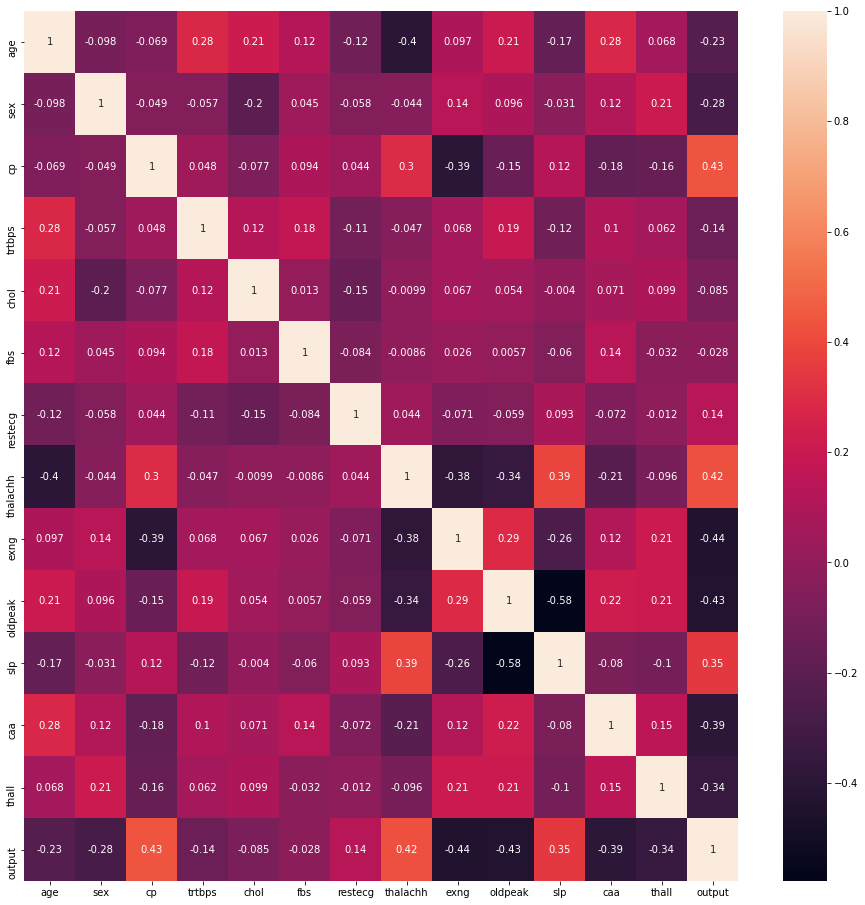

In [100]:
#Plotting a heatmap for correlation
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),annot = True)

The above heatmap proves that the independent variables are not correlated with each other.

In [105]:
#Impact of sex in Heart-Attack
plt.figure(figsize = (5,5))
df.iplot(kind = "bar",x = "sex",y = "output",size = 5)

<Figure size 360x360 with 0 Axes>

Here '0' represents Females and '1' represents Males.

From the above graph it is clear that Males have a higher chance of heartattack

In [106]:
#Impact of Chest Pain in Heart-Attack
df.iplot(kind = "bar",x = "cp",y = "output")

In [107]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Here we have an imbalance in the dataset so it would not be absolutely correct to say level 2 chest pain causes the most heart-attacks.

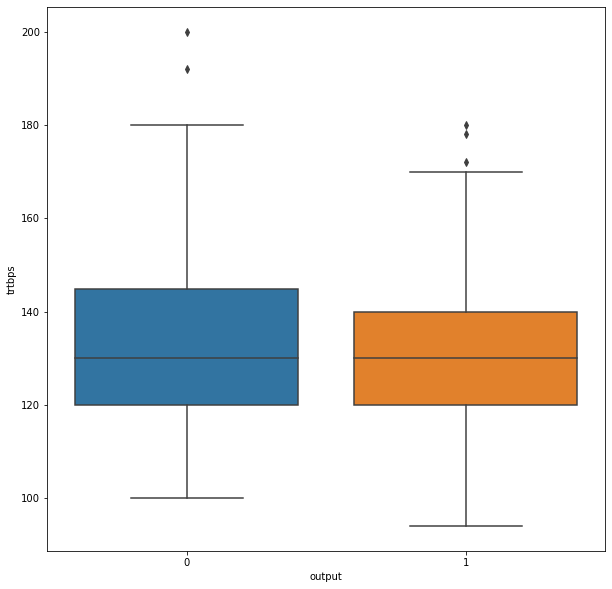

In [117]:
#Impact of resting blood pressure in Heart-Attacks
plt.figure(figsize = (10,10))
sns.boxplot(x = 'output',y = 'trtbps',data = df)

From the dataset provided we can conclude that lower blood pressure causes more heart-attacks.

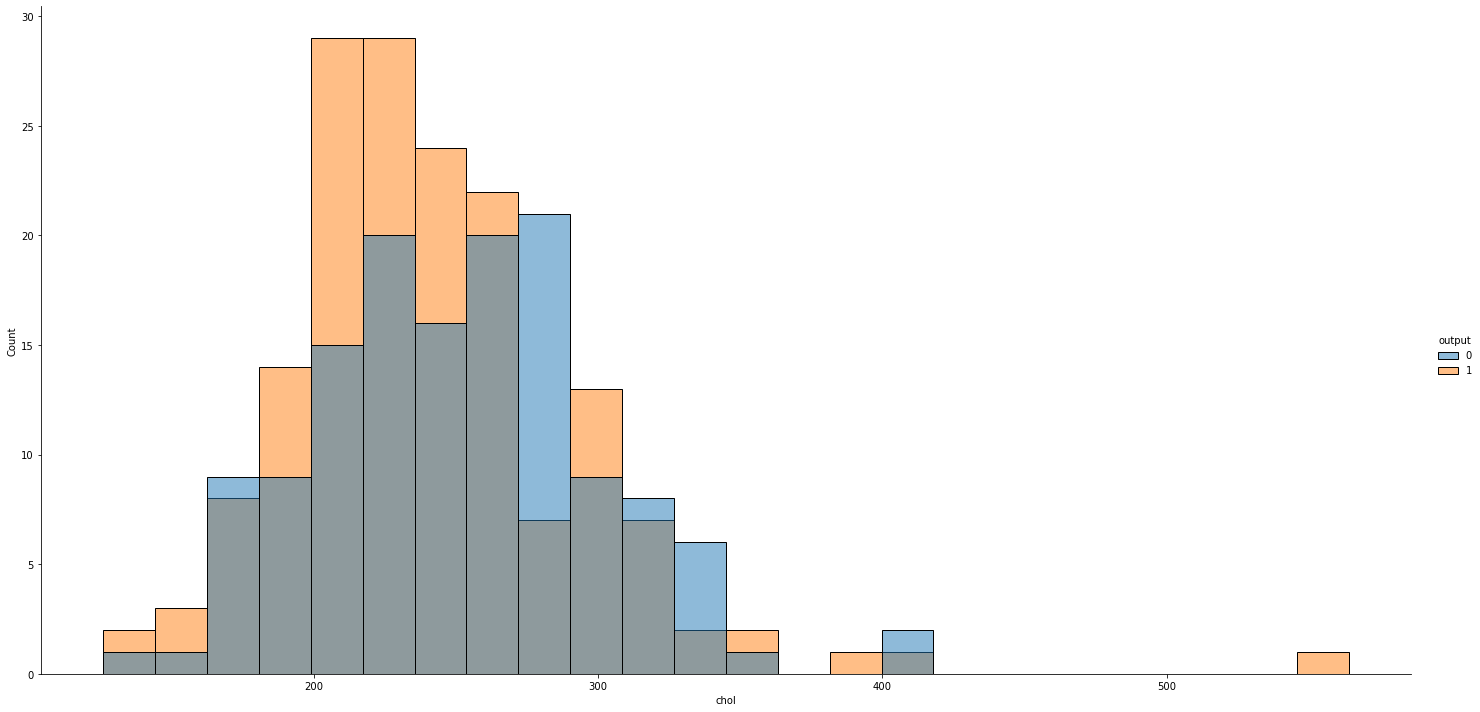

In [122]:
#Effect of cholestrol on Heart-Attacks
sns.displot(x = 'chol',data = df,hue = 'output',height = 10,aspect = 2)

It is very important to note that higher cholestrol causes heart-attacks

In [125]:
#Effect of fasting blood sugar on Heart-Attacks
df.groupby('fbs')['output'].sum().iplot(kind = "bar")

Hence fasting blood sugar less than 120mg causes more heart-attacks.

In [127]:
#Effect of resting cardiography results
df.groupby('restecg')['output'].sum().iplot(kind = "bar")

Value 1 has the greatest chance of heart-attacks.

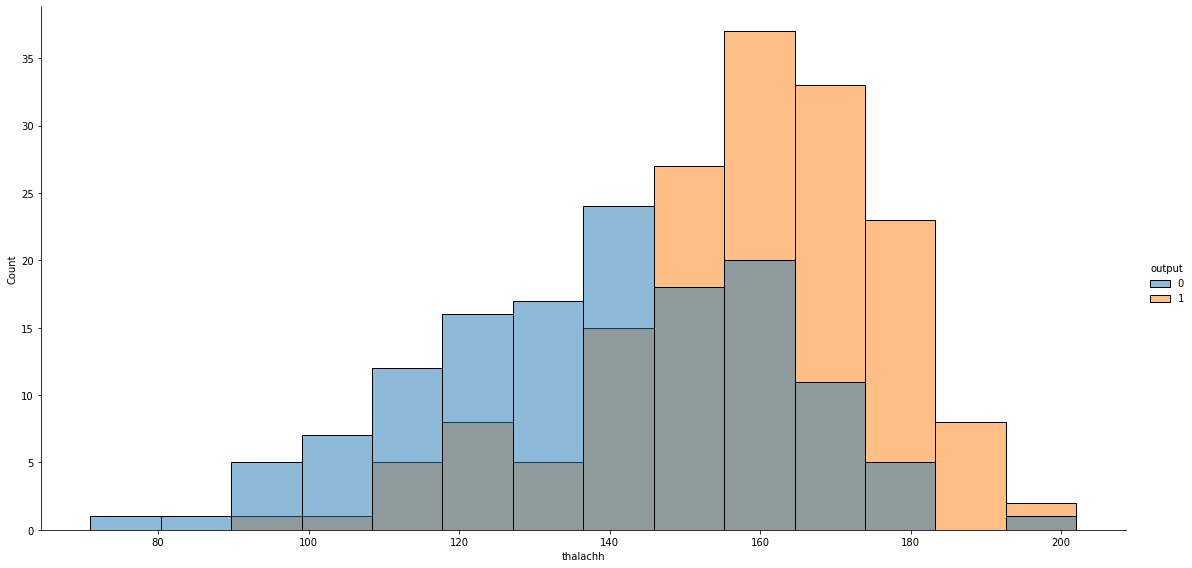

In [130]:
#Effect of maximum heart rate in heart-attack
sns.displot(x = 'thalachh',data = df,hue = 'output',height = 8,aspect = 2)

It is absolutely clear that people with higher max heart rate have the most chance of heart-attack.

In [132]:
#Effect of exercise induced angina in heart-attack
df.groupby('exng')['output'].sum().iplot(kind = "bar",xTitle = "Exercise Induced Angina")

Exercise induced angina does not have much effect in heart-attack

In [134]:
df['caa'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

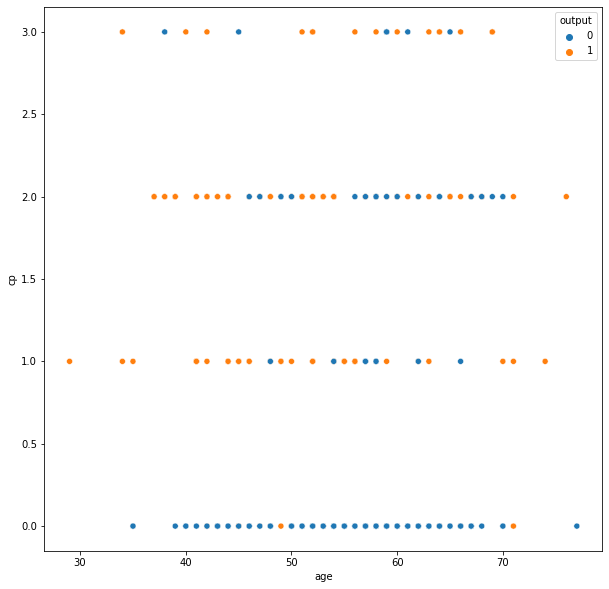

In [141]:
#Relationship between chest pain,age and heart-attack
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'age',y = 'cp',data = df,hue = 'output')

Value 1 chest pain is the most fatal across different ages.

Any chest pain across different age groups should be medically treated as soon as possible.

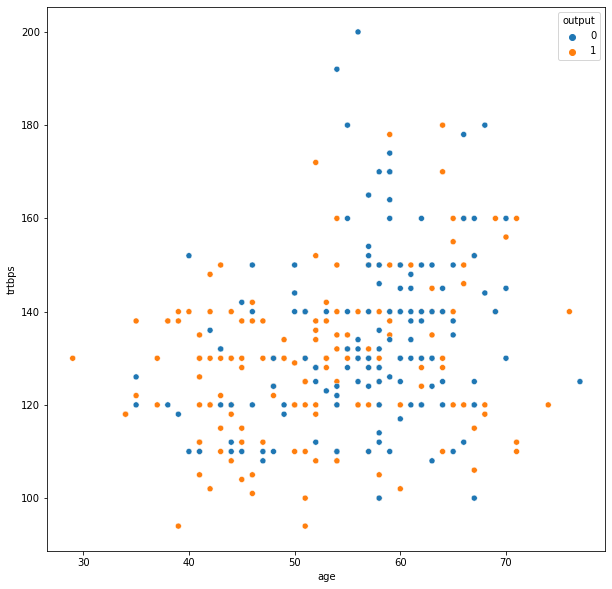

In [148]:
#Relationship between age, resting blood pressure and heart-attack
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'age',y = 'trtbps',data = df,hue = 'output')


Younger people with normal blood pressure are prone to heart attacks too according to the dataset.

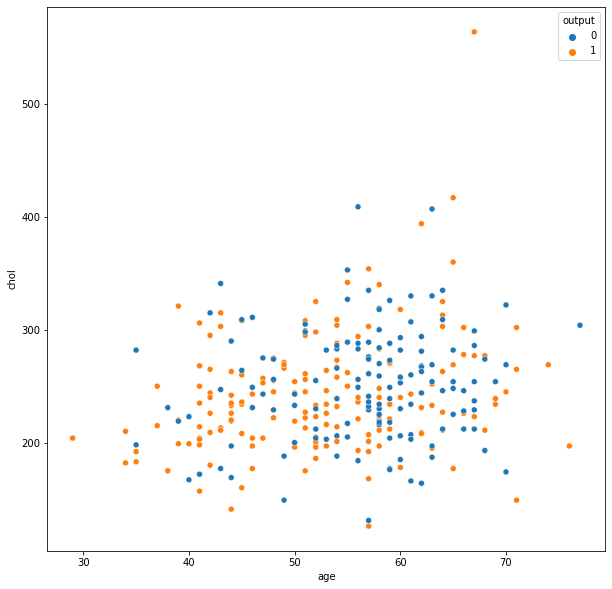

In [152]:
#Relationship between age,cholestrol and heart-attack
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'age',y = 'chol',hue = 'output',data = df)

Higher cholestrol is a major factor for heart-attack under all age groups.